## Model Interpretation & Insights

### Interpretation of model
Here we understand the reason behind machine learning model which we have trained. We have trained around 12 models in previous notebook. But will understand about only top 3 model.

Which are Ada Boost Classifier (29 KB), Gradient Boosting Classifier (137 KB), and Extra Tree Classifier (379 KB), i also choose these models as they have least size relative to other models.

Let's start with model loading.

In [1]:
import pickle

FINAL_FOLDER_NAME = "../Final_Model"
FOLDER_NAME = "../Models"
MODELS_NAMES = ["Ada_B", "Gradient B", "Extra tree"]
MODELS = {}

for EACH_MODEL_NAME in MODELS_NAMES:
    with open(f"{FOLDER_NAME}/{EACH_MODEL_NAME}.pkl", "rb") as file:
        MODELS[f"{EACH_MODEL_NAME}_classifier"] = pickle.load(file)

        print(f"Imported {EACH_MODEL_NAME} as variable {EACH_MODEL_NAME} in dict.")

Imported Ada_B as variable Ada_B in dict.
Imported Gradient B as variable Gradient B in dict.
Imported Extra tree as variable Extra tree in dict.


#### Tree type model
For tree based model we will use `feature_importances_`. and plot each feature importance with column.

In [5]:
importance_ = MODELS['Extra tree_classifier'].feature_importances_
features_ = MODELS['Extra tree_classifier'].feature_names_in_

In [6]:
importance_

array([0.03025997, 0.03256307, 0.02117647, 0.02674854, 0.12400169,
       0.00027416, 0.02999531, 0.03376705, 0.01728358, 0.02152078,
       0.02059881, 0.02913411, 0.03681062, 0.11849557, 0.14727509,
       0.01822788, 0.00428064, 0.01042674, 0.        , 0.0911882 ,
       0.0090614 , 0.1092669 , 0.00326657, 0.00696378, 0.01179665,
       0.01499799, 0.01865248, 0.01196596])

In [7]:
features_

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [6]:
import pandas as pd

In [5]:

importance_df = pd.DataFrame(
    {
        "features": features_,
        "importance": importance_,
    }
).sort_values(by="importance", ascending=False)

NameError: name 'features_' is not defined

In [9]:
importance_df.head()

,features,importance
14,TotalCharges,0.147275
4,tenure,0.124002
13,MonthlyCharges,0.118496
21,Contract_Month-to-month,0.109267
19,InternetService_Fiber optic,0.091188


This shows importance value of each column. By using this we can reiterate model development, this will reduce model training time and can improve accuracy and also reduce model size. 

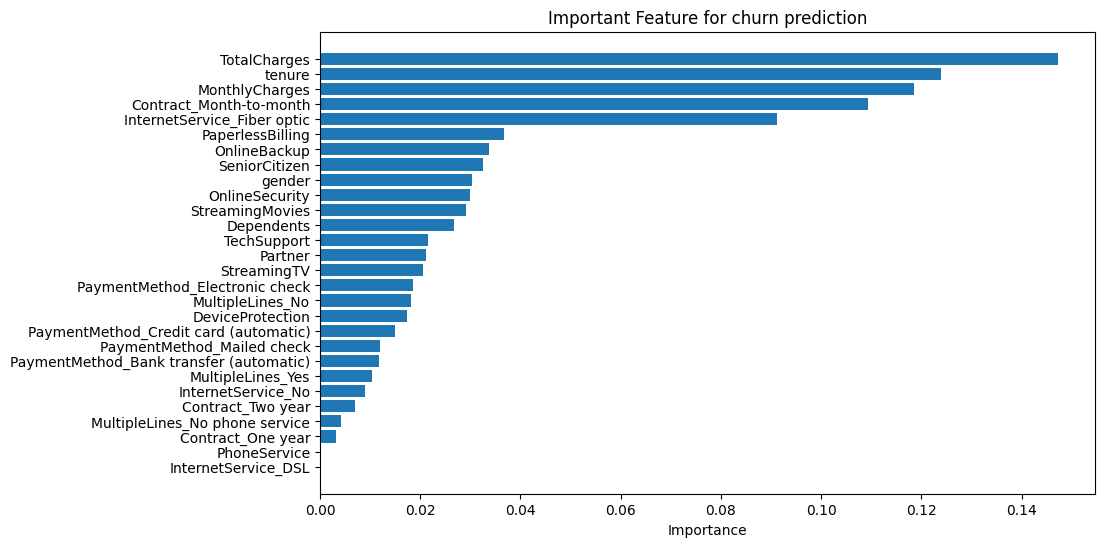

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df["features"], importance_df["importance"])
plt.title("Important Feature for churn prediction")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

This shows that two columns PhoneService, InternetService_DSL doesn't affect the model prediction at all. So, we can remove it.

According to this model, it's clear that `TotalCharges, tenure, MonthlyCharges, Contract_Month_to_Month, InternetService_Fiber_optic` are the top 5 parameters which affect churning. But this doesn't show whether these parameters affect churning positivly or negitivly.

#### NN and Gradient Based Model

For this we will use SHAP (Shapley additive explanations) library, which explains output of any model.

for doing this we will need X_train, X_test, etc and model.

In [4]:
import shap

d:\Work\Development\Python\InnoByte Internship\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df = pd.read_csv("../Data/ML Dataset after transformtion.csv").drop(
    "Unnamed: 0", axis=1
)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,2,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,2,0,2,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,2,2,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,2,0,2,2,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Let's get the summary of X_train after spliting it into train_test set.

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

In [9]:
# needed for SHAP lib
# creates summary from set kmeans
X_train_summary = shap.kmeans(X_train, 10)

In [10]:
shap.initjs()
# to import js library for plotting

#### Gradient Boosting classifier

In [35]:

ex_gradient = shap.TreeExplainer(MODELS["Gradient B_classifier"])
shap_values_gradient = ex_gradient.shap_values(X_test)

shap.force_plot(ex_gradient.expected_value, shap_values_gradient, X_test)

### Insights into features

#### Tenure:

Tenure has a negative correlation (-0.35) with churn, meaning that as the tenure increases, the likelihood of churn decreases. This is common because longer-tenured customers tend to be more loyal.

**Insight:** Focus on retaining new customers (with lower tenure) through targeted retention strategies such as onboarding bonuses or special offers within the first few months.

#### Contract (Month-to-month):

Correlation with Churn: There is a strong positive correlation (~0.40) between month-to-month contracts and churn. This shows that customers on short-term contracts are more likely to churn.

**Insight:** Provide incentives like discounts or rewards to convert these customers into longer-term contracts (1 or 2 years).

#### Contract (One year, Two years):

Correlation with Churn: These contracts are negatively correlated with churn (~ -0.18 for one-year and ~ -0.30 for two-year contracts). Longer contracts are associated with lower churn rates.

**Insight:** Promote longer-term contracts with benefits such as discounted rates, additional features, or loyalty rewards.

#### PaperlessBilling:

Correlation with Churn: A small positive correlation (~0.19) with churn, indicating that customers who have opted for paperless billing are slightly more likely to churn.

**Insight:** Investigate why customers using paperless billing might churn more. It could be that these customers prefer convenience and need other personalized services to stay engaged.

#### Monthly Charges:

Correlation with Churn: Monthly charges are positively correlated with churn (~0.19), meaning that customers with higher monthly charges tend to churn more.

**Insight:** Offer discounts, tiered plans, or extra value-added services for high-paying customers to improve retention.


#### OnlineSecurity, TechSupport, OnlineBackup:

Correlation with Churn: These features have negative correlations with churn (around ~ -0.20), indicating that customers who use these services are less likely to churn.

**Insight:** Consider promoting these services to customers who don’t currently use them, emphasizing their value in preventing churn.

#### Feature Interactions:
TotalCharges and MonthlyCharges:

Strong positive correlation (~0.65). This makes sense as TotalCharges increase with higher MonthlyCharges.
Insight: Consider monitoring customers with high TotalCharges and MonthlyCharges for churn risks, as these customers may become dissatisfied if they feel they are overpaying for services.
MultipleLines and PhoneService:

Positive correlation: Customers with phone service often have multiple lines.
Actionable Insight: Encourage single-line customers to add more lines by promoting family plans or business packages.

## Recommendations  for company

1. Focus retention efforts on new customers and those with month-to-month contracts.
2. Promote longer contracts with incentives to customers currently on short-term plans.
3. Consider offering discounts or tiered services to customers with higher MonthlyCharges.
4. Increase adoption of services like OnlineSecurity, TechSupport, and OnlineBackup, as these seem to lower churn rates.